In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.concat(
    map(pd.read_csv, ["data/preprocessed_data/corona.csv",
                      "data/preprocessed_data/test.csv",
                     "data/preprocessed_data/train.csv",
                     "data/preprocessed_data/validation.csv"]
       ), ignore_index=True)


df


,latitude,longitude,distance_to_center,year,month,weekday,pm,holiday,mean_temperature,total_precipitation,stations_count,elevation_meters,density,count
0,45.549598,-73.541874,5.530209,2020,4,2,0,False,2.2,0.0,609,21,13,1
1,45.549598,-73.541874,5.530209,2020,4,2,1,False,2.2,0.0,609,21,13,6
2,45.510351,-73.556508,1.219082,2020,4,2,0,False,2.2,0.0,609,13,34,1
3,45.510351,-73.556508,1.219082,2020,4,2,1,False,2.2,0.0,609,13,34,15
4,45.539385,-73.541000,4.532643,2020,4,2,0,False,2.2,0.0,609,16,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384468,45.499745,-73.579034,0.903139,2018,10,2,0,False,2.4,8.2,549,54,41,11
1384469,45.499745,-73.579034,0.903139,2018,10,2,1,False,2.4,8.2,549,54,41,5
1384470,45.512832,-73.576888,1.210305,2018,10,2,0,False,2.4,8.2,549,53,45,8
1384471,45.512832,-73.576888,1.210305,2018,10,2,1,False,2.4,8.2,549,53,45,6


Text(0, 0.5, 'Frequency')

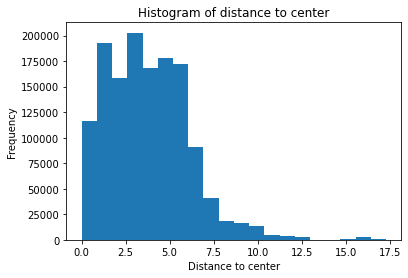

In [3]:
plt.hist(df["distance_to_center"], bins=20)
plt.title("Histogram of distance to center")
plt.xlabel("Distance to center")
plt.ylabel("Frequency")

(array([168398., 171934., 174883., 203790., 213773., 230773., 220922.]),
 array([2014.        , 2014.85714286, 2015.71428571, 2016.57142857,
        2017.42857143, 2018.28571429, 2019.14285714, 2020.        ]),
 <BarContainer object of 7 artists>)

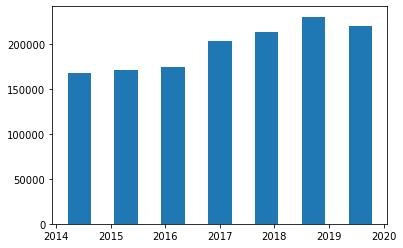

In [4]:
plt.hist(df["year"], bins = 7, rwidth = 0.5)

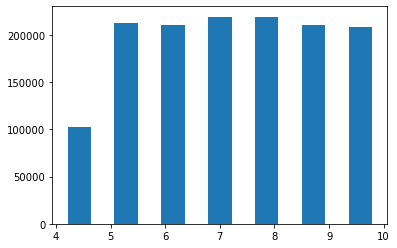

In [12]:
plt.hist(df["month"], bins = 7, rwidth=0.5)
plt.show()

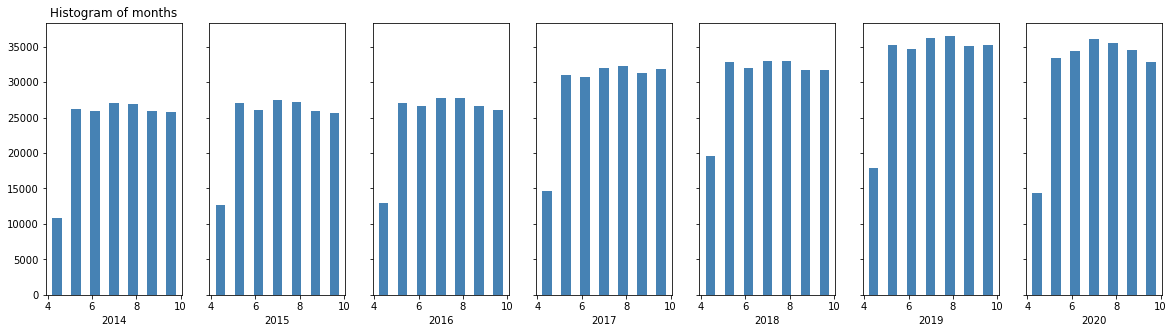

In [13]:


fig, axs = plt.subplots(1,7, figsize=(20,5), sharey="row")

i = 0
for year, group in df.groupby('year'):
    axs[i].hist(group['month'], bins = 7, rwidth=0.5, color = "steelblue")
    axs[i].set_xlabel(year)
    i += 1
axs[0].set_title("Histogram of months")
plt.show()


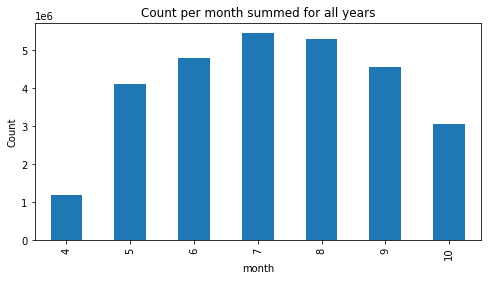

In [6]:
months = df.groupby(pd.Grouper(key="month", sort=True))["count"].sum()

fig, ax = plt.subplots(figsize=(8, 4))

months.plot(kind='bar', ax=ax, ylabel="Count")

ax.set_title("Count per month summed for all years")

plt.show()

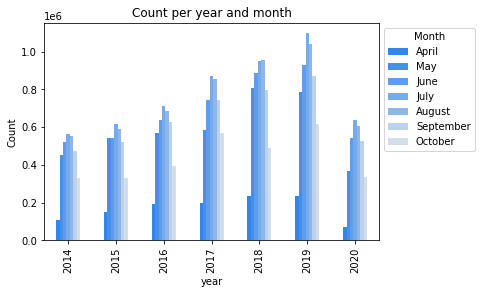

In [7]:
#plt.rcParams['figure.dpi']=300

months_df = (
    df.groupby([pd.Grouper(key='year'), 'month'])['count'].sum().unstack('month')
)
months_df.plot(kind="bar", title="Count per year and month", ylabel="Count",
              color=['#2f87eb', '#4690eb', '#5e9deb', '#75aaeb', '#8db7eb', '#bcd1eb', '#d3deeb'])

plt.legend(title="Month", labels=['April','May','June','July','August','September','October'], bbox_to_anchor=(1, 1))

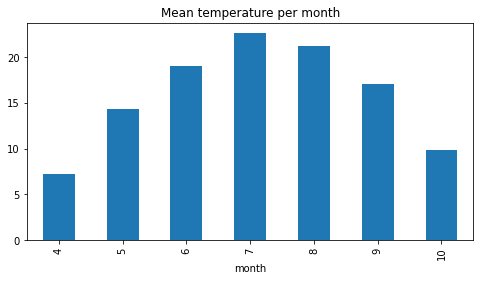

In [8]:
monthtemp = df.groupby(pd.Grouper(key="month", sort=True))["mean_temperature"].mean()

fig, ax = plt.subplots(figsize=(8, 4))

monthtemp.plot(kind='bar', ax=ax)

ax.set_title("Mean temperature per month")

plt.show()

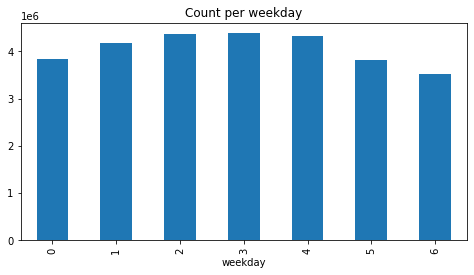

In [15]:
weekdays = df.groupby(pd.Grouper(key="weekday", sort=True))["count"].sum()

fig, ax = plt.subplots(figsize=(8, 4))

weekdays.plot(kind='bar', ax=ax)

ax.set_title("Count per weekday")

plt.show()



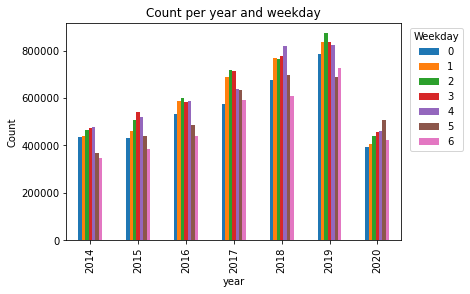

In [14]:
weekdays_df = (
    df.groupby([pd.Grouper(key='year'), 'weekday'])['count'].sum().unstack('weekday')
)
weekdays_df.plot(kind="bar", title="Count per year and weekday", ylabel="Count")
plt.legend(title="Weekday", bbox_to_anchor=(1.2, 1))
plt.show()

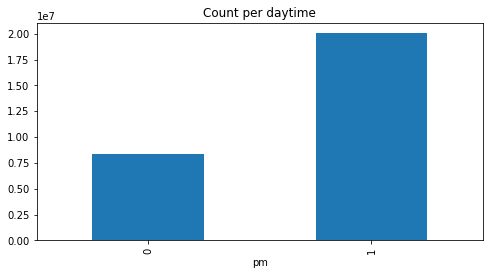

In [10]:
ampm = df.groupby(pd.Grouper(key="pm"))["count"].sum()

fig, ax = plt.subplots(figsize=(8, 4))

ampm.plot(kind='bar', ax=ax)

ax.set_title("Count per daytime")

plt.show()

[Text(0.5, 1.0, 'Count per weekday and daytime')]

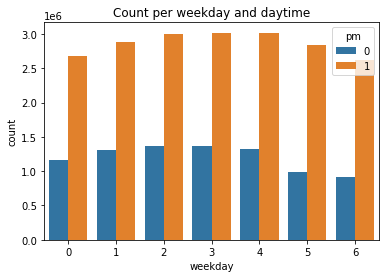

In [19]:
weekdaycounts = df.groupby(["weekday", "pm"]).agg(count=("count", 'sum'))
weekdaycounts = weekdaycounts.reset_index()

sns.barplot(x="weekday", y="count", hue="pm", data=weekdaycounts).set(title = "Count per weekday and daytime") 

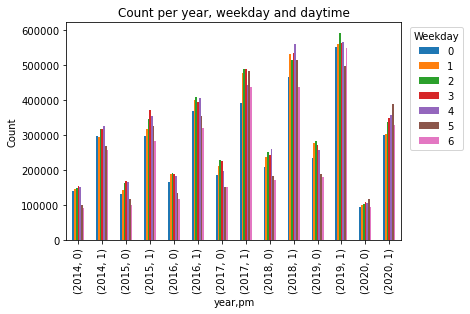

In [18]:
weekdayspm_df = (
    df.groupby([pd.Grouper(key='weekday'), 'year', 'pm'])['count'].sum().unstack('weekday')
)
weekdayspm_df.plot(kind="bar", title="Count per year, weekday and daytime", ylabel="Count")

plt.legend(title="Weekday", bbox_to_anchor=(1.2, 1))
plt.show()

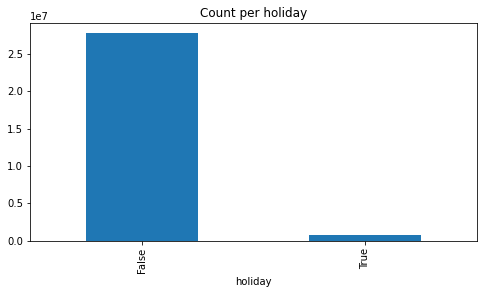

holiday
0    4455836
1     107202
Name: count, dtype: int32

<AxesSubplot:title={'center':'Relative Count per holiday in 2017'}, xlabel='holiday'>

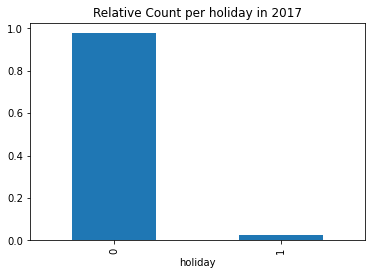

In [20]:
holidays = df.groupby(pd.Grouper(key="holiday", sort=True))["count"].sum()

fig, ax = plt.subplots(figsize=(8, 4))

holidays.plot(kind='bar', ax=ax)

ax.set_title("Count per holiday")

plt.show()

#Bitte relativ und gefiltert für das Jahr 2017

holidays2017 = df[df["year"] == 2017].astype(int).groupby(pd.Grouper(key="holiday", sort=True))["count"].sum()
display(holidays2017)
holidays2017[0] = 4455836/(4455836+107202)
holidays2017[1] = 107202/(4455836+107202)
holidays2017.plot(title = "Relative Count per holiday in 2017", kind="bar")

Text(0.5, 1.0, 'Histogram of Mean temperature')

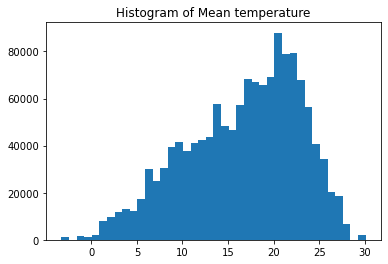

In [21]:
plt.hist(df["mean_temperature"], bins = 40)
plt.title("Histogram of Mean temperature")

# Kleiner 5 Grad und größer 25 Grad sind outliers

Text(0.5, 1.0, 'Histogram of total precipitation')

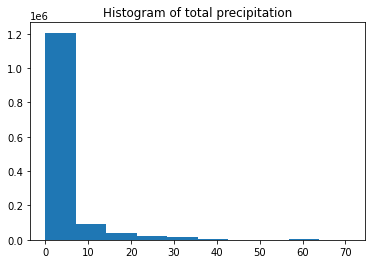

In [22]:
plt.hist(df["total_precipitation"], bins = 10)
plt.title("Histogram of total precipitation")

# total_percipitation > 10 sind outliers

# Muss geklärt werden was der Wert aussagt

Text(0.5, 1.0, 'Histogram of elevation meters')

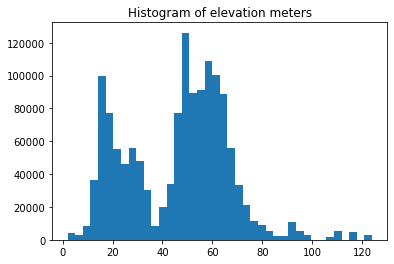

In [24]:
plt.hist(df["elevation_meters"], bins = 40)
plt.title("Histogram of elevation meters")

#elevation of city center is 42m above NN. Maybe 30m Range all over and beneath are outlier? 

Text(0.5, 1.0, 'Histogram of station density')

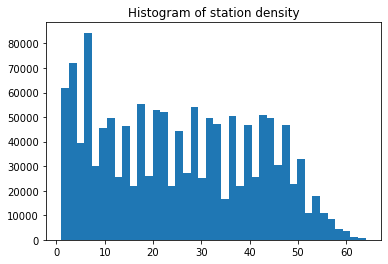

In [25]:
plt.hist(df["density"], bins = 40)
plt.title("Histogram of station density")
# Outliers schwierig auszumachen. Erkenntnis mehr als 50 Stationen im Umkreis von 1km rechnen sich nicht wirklich.
# Viele nutzen bixi in Regionen wo weniger Stationen im Umkreis sind. Karte zeigt dass mehrere Stationen auserhalb vom Zentrum ist.

Text(0.5, 1.0, 'Elevetion meters and station density with 609 stations in 2020')

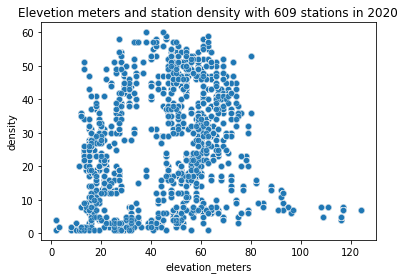

In [28]:
df609 = df[df["stations_count"] == 609]
sns.scatterplot(data = df609, x="elevation_meters", y="density", alpha=0.5)
plt.title("Elevetion meters and station density with 609 stations in 2020")

Text(0.5, 1.0, 'Station density and count in 2019')

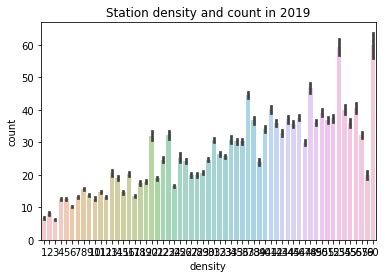

In [31]:
df2019 = df[df["year"] == 2019]
sns.barplot(data = df2019, x="density", y="count", alpha=0.5)
plt.title("Station density and count in 2019")

Text(0.5, 1.0, 'Station Count and station density')

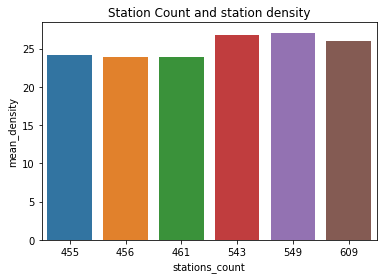

In [32]:
stationdensity = df.groupby(["stations_count"]).agg(mean_density=("density", 'mean'))
stationdensity = stationdensity.reset_index()

sns.barplot(data=stationdensity, x = "stations_count", y = "mean_density")
plt.title("Station Count and station density")